In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter 

In [35]:
path = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\Atmospheric Data Scraper\clean_atmospheric_data.csv"
df = pd.read_csv(path)
df['Temperature'] = df['Temperature']
df.head(2)

,Timestamp,Level,Temperature,Relative Humidity,altitude (ft),RH_ice,contrailPresent
0,2022-09-01 01:00:00,500.0,267.690735,15.713322,18281.181,16.563252,1.0
1,2022-09-01 01:00:00,475.0,264.653305,13.301727,19515.537,14.438120,1.0


In [34]:
path1= r'C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\Data Visualizations\atmospheric_data_ice_humidity.csv'
df1=pd.read_csv(path1)

In [4]:
# Check for any missing values in the 'Level' column

# Check the unique levels
unique_levels = df1['Level'].unique()
print(unique_levels)

[500 475 450 425 400 350 325 300 275 250 225 200 375]


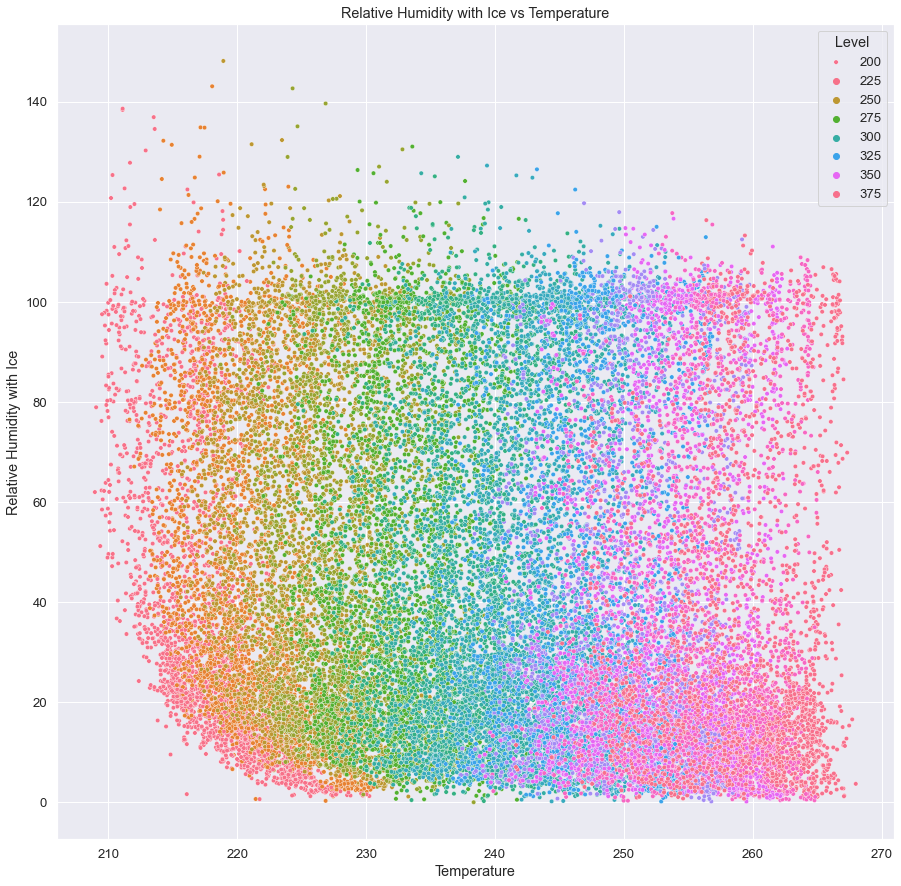

In [5]:
unique_levels_sorted = np.sort(unique_levels)
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)

sns.scatterplot(data=df1, x='Temperature', y='RH_ice', hue='Level', palette='husl', s=20)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity with Ice')
plt.title('Relative Humidity with Ice vs Temperature')

plt.legend(title='Level', labels=unique_levels_sorted)

# Show the plot
plt.show()


<ipython-input-31-8df27ae8bf79>:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


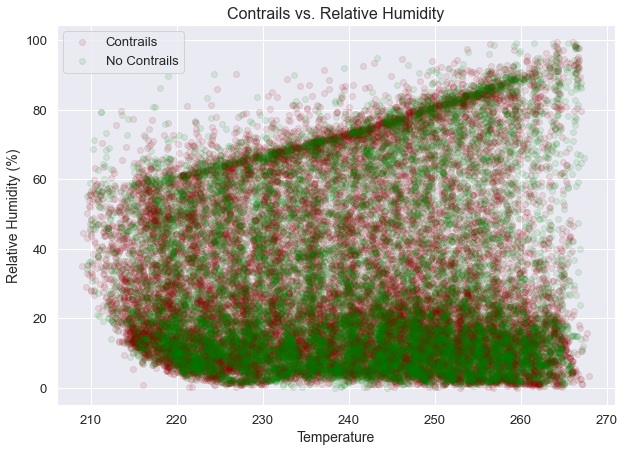

In [31]:
# Plot to see correlation
with_contrails = df[df['contrailPresent'] == 1]
without_contrails = df[df['contrailPresent'] == 0]

plt.figure(figsize=(10, 7))
plt.scatter(with_contrails['Temperature'], with_contrails['Relative Humidity'], color='darkred', label='Contrails', alpha=.10)
plt.scatter(without_contrails['Temperature'], without_contrails['Relative Humidity'], color='green', label='No Contrails', alpha=.1)

plt.xlabel('Temperature', size=14)
plt.ylabel('Relative Humidity (%)', size=14)
plt.title('Contrails vs. Relative Humidity', size=16)
plt.legend()
plt.show()

In [10]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])

<ipython-input-33-f994df9082c2>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


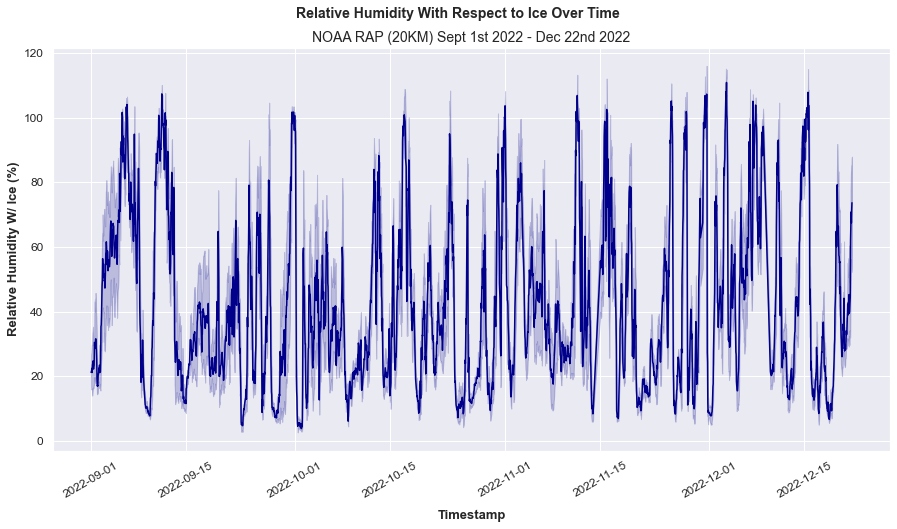

In [33]:
x = df['Timestamp']
y = df['RH_ice']

plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(x=x, y=y, color='darkblue') 

plt.ylabel('Relative Humidity W/ Ice (%)', fontsize=13, fontweight='bold')
plt.xlabel('Timestamp', fontsize=13, fontweight='bold', labelpad=10)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle('Relative Humidity With Respect to Ice Over Time', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.title('NOAA RAP (20KM) Sept 1st 2022 - Dec 22nd 2022', fontsize=14, fontfamily='Arial', fontweight='normal')
             
plt.subplots_adjust(top=.90, bottom=0.1)
plt.show()

plt.savefig('Relative Humidity With Respect to Ice Over Time.png')

<ipython-input-13-4b3bfeb6c39e>:40: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


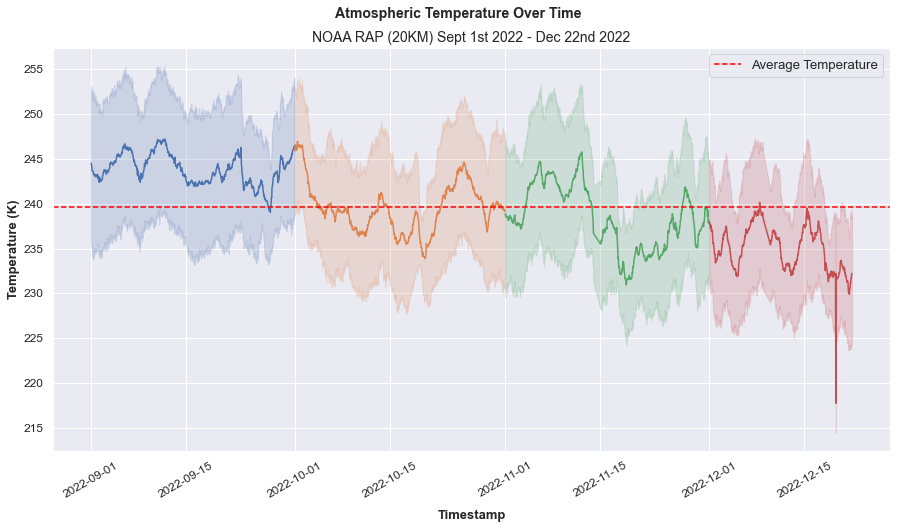

In [13]:
avg_TMP = df['Temperature'].mean()

x = df['Timestamp']
y1 = df['Temperature']

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df['Month'] = df['Timestamp'].dt.month
grouped_df = df.groupby('Month')

plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')

for month, data in grouped_df:
    sns.lineplot(data=data, x='Timestamp', y='Temperature', label=None)

# Add average line
plt.axhline(avg_TMP, color='red', linestyle='--', label='Average Temperature')

plt.ylabel('Temperature (K)', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold', labelpad=10)

plt.suptitle('Atmospheric Temperature Over Time', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.title('NOAA RAP (20KM) Sept 1st 2022 - Dec 22nd 2022', fontsize=14, fontfamily='Arial', fontweight='normal')

plt.subplots_adjust(top=.90, bottom=0.1)
plt.legend()
plt.savefig('Atmospheric_Temperature_Over_Time.png')
plt.show()


# Create Subsets to look at the data at different Timestamps

In [14]:
df.index = pd.to_datetime(df.Timestamp)
df.head(2)

,Timestamp,Level,Temperature,Relative Humidity,altitude (ft),RH_ice,contrailPresent,Month
Timestamp,,,,,,,,
2022-09-01 01:00:00,2022-09-01 01:00:00,500.0,267.690735,15.713322,18281.181,16.563252,1.0,9
2022-09-01 01:00:00,2022-09-01 01:00:00,475.0,264.653305,13.301727,19515.537,14.438120,1.0,9


In [15]:
# Create a subset for 4-week span with midnight data
start_date = pd.Timestamp('2022-09-01 00:00:00')
end_date = start_date + pd.DateOffset(weeks=4)
midnight_subset = df.between_time('00:00:00', '00:00:00').loc[start_date:end_date]
morning_subset = df.between_time('06:00', '06:00').loc[start_date:end_date]
afternoon_subset = df.between_time('12:00', '12:00').loc[start_date:end_date]
evening_subset = df.between_time('18:00', '18:00').loc[start_date:end_date]

<ipython-input-16-ae672e467a39>:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


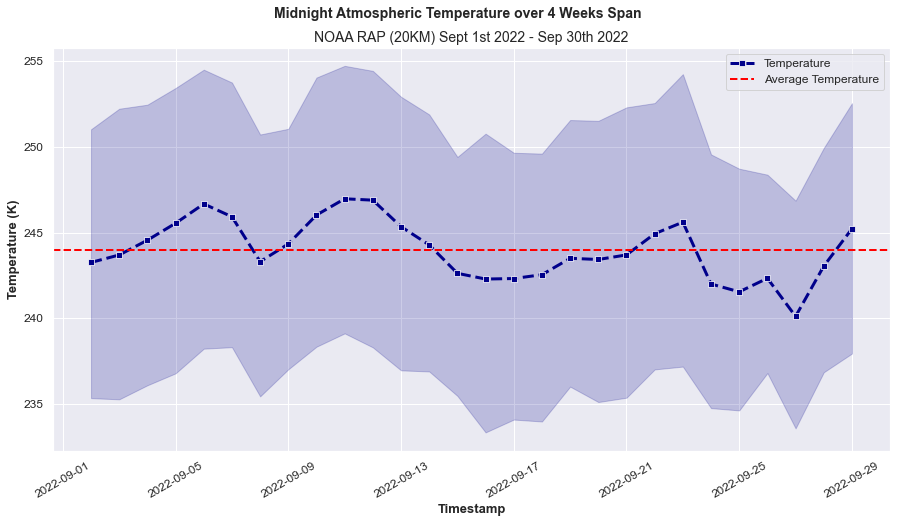

In [16]:
# Calculate average temperature
mid_night_avg_TMP = midnight_subset['Temperature'].mean()

# Plot the temperature data
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(data=midnight_subset['Temperature'], color='darkblue', ls='dashed', marker='s', lw='3', label='Temperature')
plt.axhline(mid_night_avg_TMP, color='red', linestyle='--', lw='2', label='Average Temperature')

plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Temperature (K)', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle('Midnight Atmospheric Temperature over 4 Weeks Span', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.title('NOAA RAP (20KM) Sept 1st 2022 - Sep 30th 2022', fontsize=14, fontfamily='Arial', fontweight='normal')
plt.subplots_adjust(top=.90, bottom=0.1)
plt.legend(fontsize=12)


plt.show()

plt.savefig('Midnight Atmospheric Temperature over 4 Weeks Span.png')

<ipython-input-17-206f80a448ed>:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


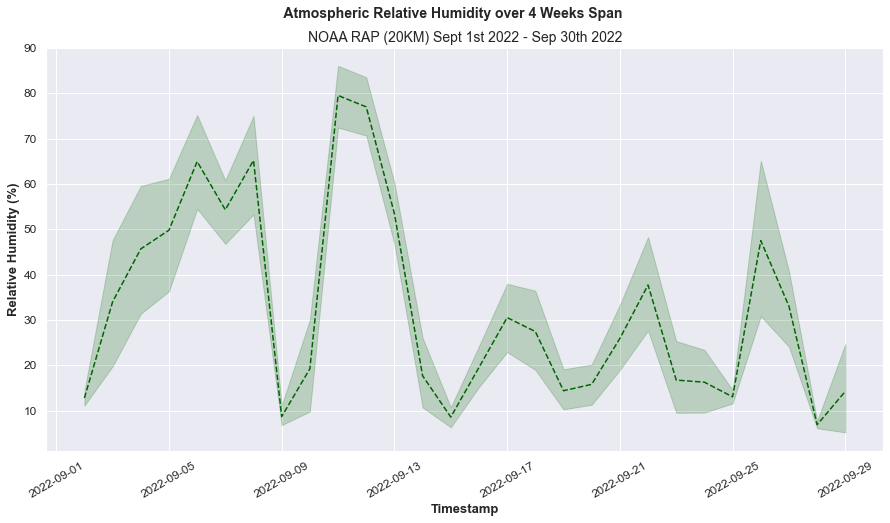

In [17]:
# Plot the Humidity data
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(data=midnight_subset['Relative Humidity'], color='darkgreen', ls='dashed', marker='')

plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Relative Humidity (%)', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle(' Atmospheric Relative Humidity over 4 Weeks Span', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.title('NOAA RAP (20KM) Sept 1st 2022 - Sep 30th 2022', fontsize=14, fontfamily='Arial', fontweight='normal')
plt.subplots_adjust(top=.90, bottom=0.1)

plt.show()
plt.savefig('Atmospheric Relative Humidity over 4 Weeks Span.png')

<ipython-input-18-a27527843d71>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


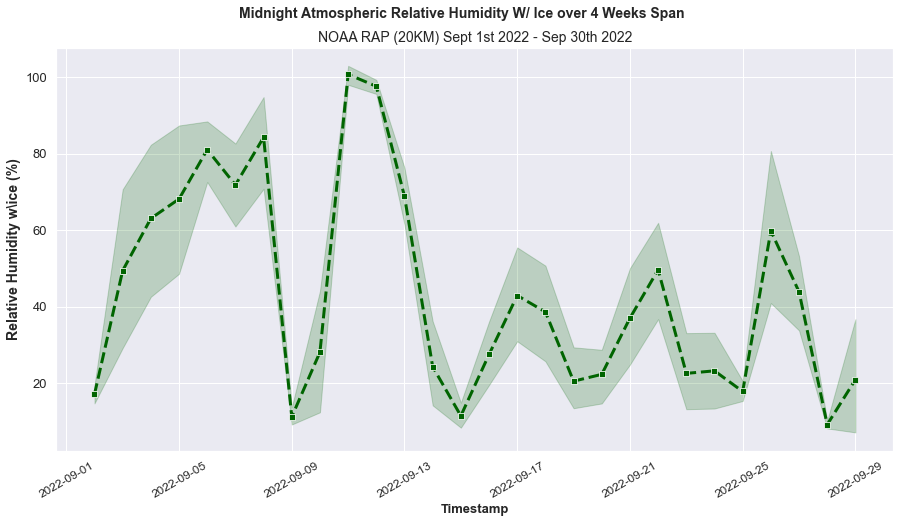

In [18]:
# Plot the temperature data
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(data=midnight_subset['RH_ice'], color='darkgreen', ls='dashed', marker='s', lw='3')

plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Relative Humidity w\ice (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=13)
plt.suptitle('Midnight Atmospheric Relative Humidity W/ Ice over 4 Weeks Span', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.title('NOAA RAP (20KM) Sept 1st 2022 - Sep 30th 2022', fontsize=14, fontfamily='Arial', fontweight='normal')
plt.subplots_adjust(top=.90, bottom=0.1)
plt.show()

plt.savefig('Midnight Atmospheric Relative Humidity With Ice over 4 Weeks Span.png')


<ipython-input-20-97b03395f01d>:25: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


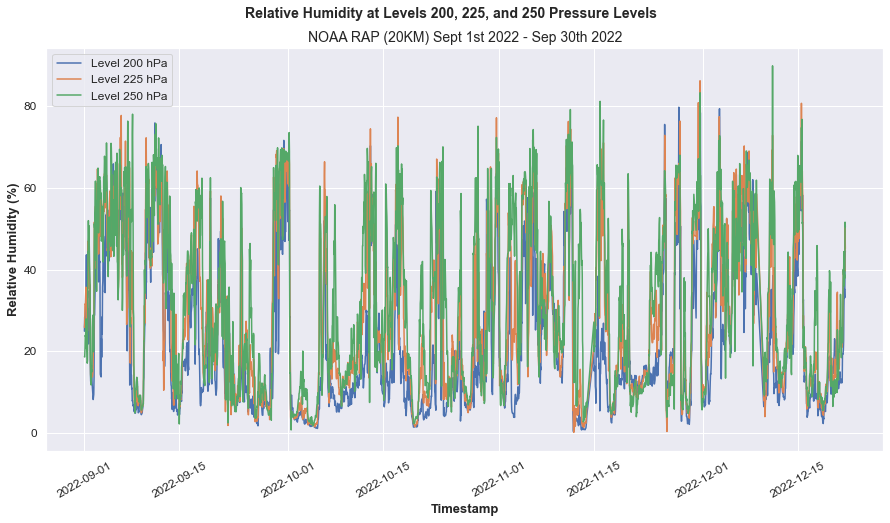

In [20]:
# Filter the DataFrame for levels 200, 225, and 250
level_200_data = df[df['Level'] == 200]
level_225_data = df[df['Level'] == 225]
level_250_data = df[df['Level'] == 250]

plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')

sns.lineplot(data=level_200_data, x='Timestamp', y='Relative Humidity', label='Level 200 hPa')
sns.lineplot(data=level_225_data, x='Timestamp', y='Relative Humidity', label='Level 225 hPa')
sns.lineplot(data=level_250_data, x='Timestamp', y='Relative Humidity', label='Level 250 hPa')

plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Relative Humidity (%)', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle('Relative Humidity at Levels 200, 225, and 250 Pressure Levels', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.title('NOAA RAP (20KM) Sept 1st 2022 - Sep 30th 2022', fontsize=14, fontfamily='Arial', fontweight='normal')
plt.subplots_adjust(top=.90, bottom=0.1)

plt.legend(fontsize=12)

plt.show()

plt.savefig('Relative Humidity at Levels 200, 225, and 250 Pressure Levels.png')


<ipython-input-23-89bddb3c05e8>:38: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


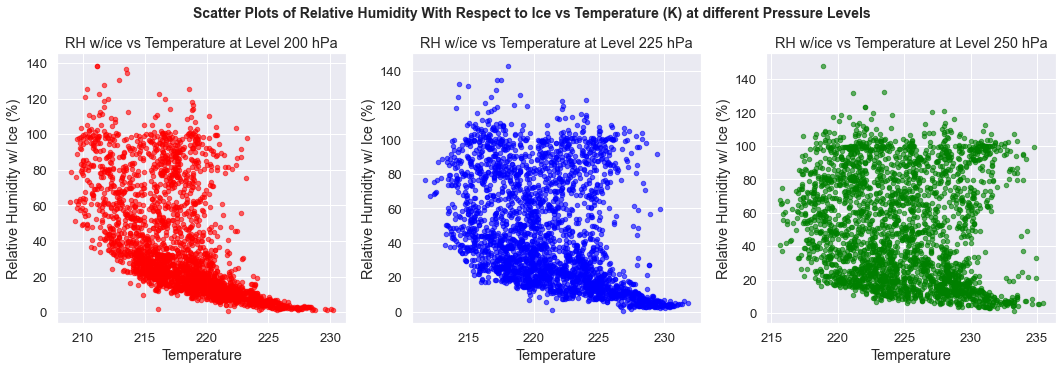

In [23]:
# create group for each pressure level
level_200_data = df[df['Level'] == 200]
level_225_data = df[df['Level'] == 225]
level_250_data = df[df['Level'] == 250]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Level 200
axes[0].scatter(level_200_data['Temperature'], level_200_data['RH_ice'], color='red', marker='o', alpha=0.6, s=20)
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Relative Humidity w/ Ice (%)')
axes[0].set_title('RH w/ice vs Temperature at Level 200 hPa')
axes[0].grid(True)
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Scatter plot for Level 225
axes[1].scatter(level_225_data['Temperature'], level_225_data['RH_ice'], color='blue', marker='o', alpha=0.6, s=20)
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Relative Humidity w/ Ice (%)')
axes[1].set_title('RH w/ice vs Temperature at Level 225 hPa')
axes[1].grid(True)
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Scatter plot for Level 250
axes[2].scatter(level_250_data['Temperature'], level_250_data['RH_ice'], color='green', marker='o', alpha=0.6, s=20)
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('Relative Humidity w/ Ice (%)')
axes[2].set_title('RH w/ice vs Temperature at Level 250 hPa')
axes[2].grid(True)
axes[2].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.tight_layout()

plt.suptitle('Scatter Plots of Relative Humidity With Respect to Ice vs Temperature (K) at different Pressure Levels', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.subplots_adjust(top=.85, bottom=0.1)
plt.show()

plt.savefig('Scatter Plots of Relative Humidity With Respect to Ice vs Temperature (K) at different Pressure Levels.png')

<ipython-input-24-3e910d8612cf>:53: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


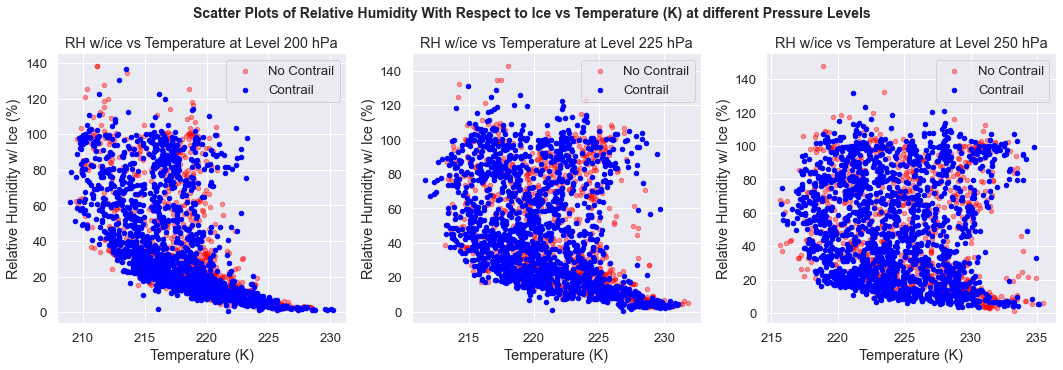

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Level 200
axes[0].scatter(level_200_data[level_200_data['contrailPresent'] == 0]['Temperature'], 
               level_200_data[level_200_data['contrailPresent'] == 0]['RH_ice'], 
               c='red', marker='o', s=20, label='No Contrail', alpha=.40)
axes[0].scatter(level_200_data[level_200_data['contrailPresent'] == 1]['Temperature'], 
               level_200_data[level_200_data['contrailPresent'] == 1]['RH_ice'], 
               c='blue', marker='o', s=20, label='Contrail')
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Relative Humidity w/ Ice (%)')
axes[0].set_title('RH w/ice vs Temperature at Level 200 hPa')
axes[0].grid(True)
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Scatter plot for Level 225
axes[1].scatter(level_225_data[level_225_data['contrailPresent'] == 0]['Temperature'], 
               level_225_data[level_225_data['contrailPresent'] == 0]['RH_ice'], 
               c='red', marker='o', s=20, label='No Contrail', alpha=.40)
axes[1].scatter(level_225_data[level_225_data['contrailPresent'] == 1]['Temperature'], 
               level_225_data[level_225_data['contrailPresent'] == 1]['RH_ice'], 
               c='blue', marker='o', s=20, label='Contrail')
axes[1].set_xlabel('Temperature (K)')
axes[1].set_ylabel('Relative Humidity w/ Ice (%)')
axes[1].set_title('RH w/ice vs Temperature at Level 225 hPa')
axes[1].grid(True)
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Scatter plot for Level 250
axes[2].scatter(level_250_data[level_250_data['contrailPresent'] == 0]['Temperature'], 
               level_250_data[level_250_data['contrailPresent'] == 0]['RH_ice'], 
               c='red', marker='o', s=20, label='No Contrail', alpha=.40)
axes[2].scatter(level_250_data[level_250_data['contrailPresent'] == 1]['Temperature'], 
               level_250_data[level_250_data['contrailPresent'] == 1]['RH_ice'], 
               c='blue', marker='o', s=20, label='Contrail')
axes[2].set_xlabel('Temperature (K)')
axes[2].set_ylabel('Relative Humidity w/ Ice (%)')
axes[2].set_title('RH w/ice vs Temperature at Level 250 hPa')
axes[2].grid(True)
axes[2].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.tight_layout()

plt.suptitle('Scatter Plots of Relative Humidity With Respect to Ice vs Temperature (K) at different Pressure Levels', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.subplots_adjust(top=.85, bottom=0.1)
plt.show()

plt.savefig('Scatter Plots of Relative Humidity With Respect to Ice vs Temperature (K) at different Pressure Levels By ContrailsPresence .png')

<ipython-input-25-2b545425020a>:57: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


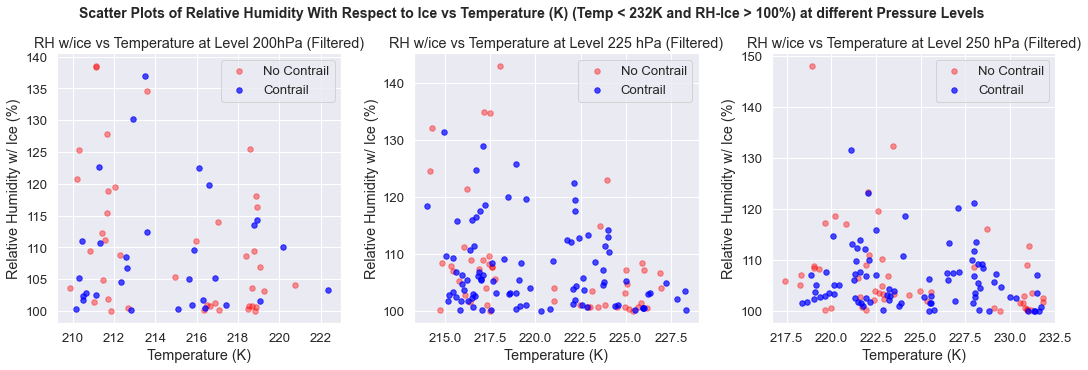

In [25]:
# Narrow down the criteria where temperature is less than 232K and 'RH_ice' is greater than 100% for each level
level_200_data = df[(df['Level'] == 200) & (df['Temperature'] < 232) & (df['RH_ice'] > 100)]
level_225_data = df[(df['Level'] == 225) & (df['Temperature'] < 232) & (df['RH_ice'] > 100)]
level_250_data = df[(df['Level'] == 250) & (df['Temperature'] < 232) & (df['RH_ice'] > 100)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Level 200
axes[0].scatter(level_200_data[level_200_data['contrailPresent'] == 0]['Temperature'], 
                level_200_data[level_200_data['contrailPresent'] == 0]['RH_ice'], 
                c='red', marker='o', label='No Contrail', alpha=0.4, s=30)
axes[0].scatter(level_200_data[level_200_data['contrailPresent'] == 1]['Temperature'], 
                level_200_data[level_200_data['contrailPresent'] == 1]['RH_ice'], 
                c='blue', marker='o', label='Contrail', alpha=0.7, s=30)
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Relative Humidity w/ Ice (%)')
axes[0].set_title('RH w/ice vs Temperature at Level 200hPa (Filtered)')
axes[0].grid(True)

# Scatter plot for Level 225
axes[1].scatter(level_225_data[level_225_data['contrailPresent'] == 0]['Temperature'], 
                level_225_data[level_225_data['contrailPresent'] == 0]['RH_ice'], 
                c='red', marker='o', label='No Contrail', alpha=0.4, s=30)
axes[1].scatter(level_225_data[level_225_data['contrailPresent'] == 1]['Temperature'], 
                level_225_data[level_225_data['contrailPresent'] == 1]['RH_ice'], 
                c='blue', marker='o', label='Contrail', alpha=0.7, s=30)
axes[1].set_xlabel('Temperature (K)')
axes[1].set_ylabel('Relative Humidity w/ Ice (%)')
axes[1].set_title('RH w/ice vs Temperature at Level 225 hPa (Filtered)')
axes[1].grid(True)

# Scatter plot for Level 250
axes[2].scatter(level_250_data[level_250_data['contrailPresent'] == 0]['Temperature'], 
                level_250_data[level_250_data['contrailPresent'] == 0]['RH_ice'], 
                c='red', marker='o', label='No Contrail', alpha=0.4, s=30)
axes[2].scatter(level_250_data[level_250_data['contrailPresent'] == 1]['Temperature'], 
                level_250_data[level_250_data['contrailPresent'] == 1]['RH_ice'], 
                c='blue', marker='o', label='Contrail', alpha=0.7, s=30)
axes[2].set_xlabel('Temperature (K)')
axes[2].set_ylabel('Relative Humidity w/ Ice (%)')
axes[2].set_title('RH w/ice vs Temperature at Level 250 hPa (Filtered)')
axes[2].grid(True)

# Add legend
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.tight_layout()


plt.suptitle('Scatter Plots of Relative Humidity With Respect to Ice vs Temperature (K) (Temp < 232K and RH-Ice > 100%) at different Pressure Levels', fontsize=14, fontweight='bold', fontfamily='Arial')

plt.subplots_adjust(top=.85, bottom=0.1)
plt.show()

plt.savefig("Scatter Plots of Relative Humidity With Respect to Ice vs Temperatur(Temp232K and RH-Ice100).png")


<ipython-input-27-35fa2aaf6eec>:27: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


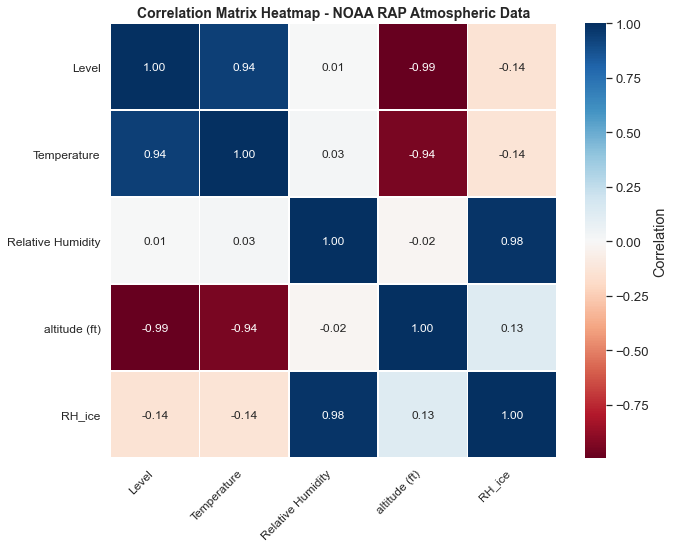

In [27]:
heatmap_data = df[['Level', 'Temperature', 'Relative Humidity', 'altitude (ft)', 'RH_ice' ]]
corr_matrix = heatmap_data.corr()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
custom_palette = sns.color_palette("RdBu", as_cmap=True)

# Create the heatmap with the custom color palette
sns.heatmap(corr_matrix, annot=True, cmap=custom_palette, fmt='.2f', cbar_kws={'label': 'Correlation'},
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            annot_kws={'size': 12},
            linewidths=0.5)

plt.title('Correlation Matrix Heatmap - NOAA RAP Atmospheric Data', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

<ipython-input-28-b33037625b55>:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<Figure size 504x504 with 0 Axes>

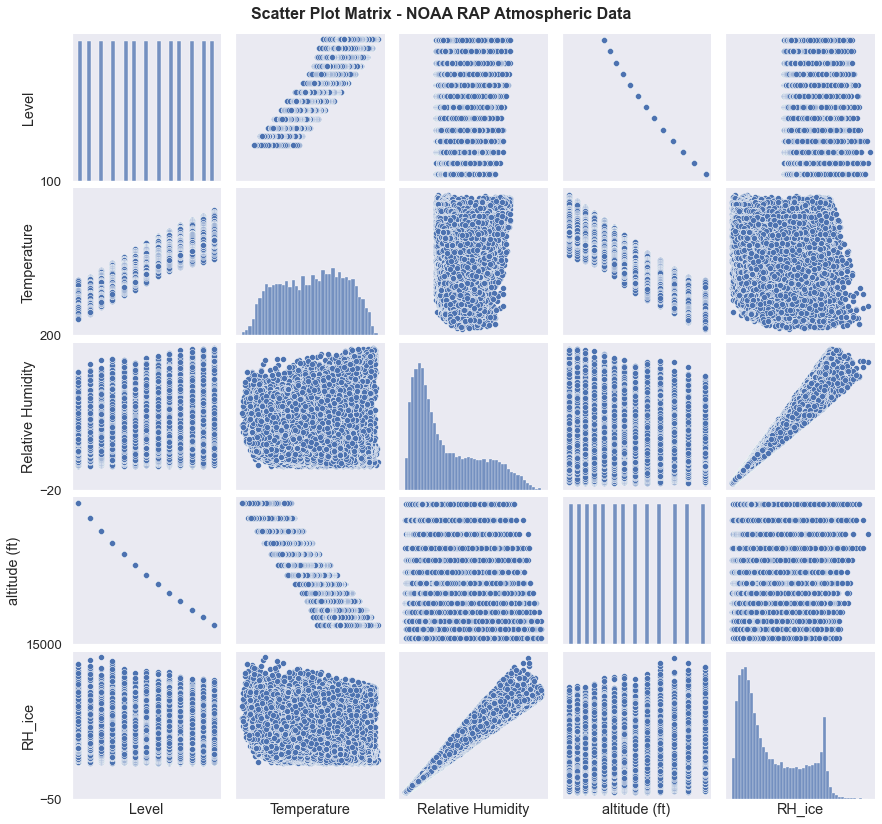

In [28]:

# Create the scatter plot matrix 
plt.figure(figsize=(7, 7))
sns.set(font_scale=1.2)
scatterplot_data = df[['Level', 'Temperature', 'Relative Humidity', 'altitude (ft)', 'RH_ice']]

sns.set(font_scale=1.2)
g = sns.pairplot(scatterplot_data)

for ax in g.axes.flat:
    ax.set_yticks(ax.get_yticks()[::2]) 
    ax.set_xticks(ax.get_xticks()[::2])  
plt.suptitle('Scatter Plot Matrix - NOAA RAP Atmospheric Data', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=.95, bottom=0.1)
plt.show()

<ipython-input-29-4ea37a6e9b80>:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


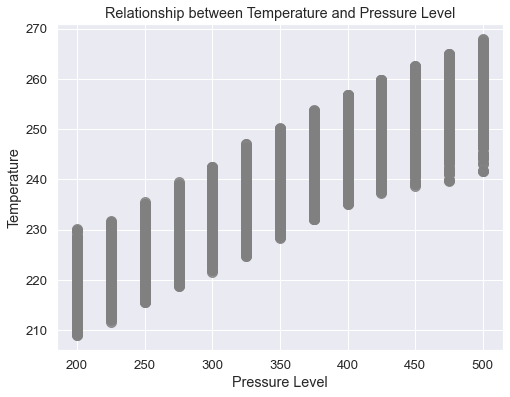

In [29]:
scatterplot_data = df[['Level', 'Temperature']]

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the scatter plot
plt.scatter(scatterplot_data['Level'], scatterplot_data['Temperature'], s=100, c='grey', alpha=0.8)

# Add labels and title
plt.xlabel('Pressure Level')
plt.ylabel('Temperature')
plt.title('Relationship between Temperature and Pressure Level')

# Show the plot
plt.show()

In [32]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B615-35E8

 Directory of C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\Data Visualizations

08/09/2023  02:26 PM    <DIR>          .
08/09/2023  01:48 PM    <DIR>          ..
08/09/2023  01:48 PM    <DIR>          .ipynb_checkpoints
08/09/2023  02:21 PM            89,757 Atmospheric Relative Humidity over 4 Weeks Span.png
08/04/2023  05:29 PM         2,345,584 atmospheric_data_ice_humidity.csv
08/09/2023  02:20 PM           113,077 Atmospheric_Temperature_Over_Time.png
08/09/2023  02:26 PM         3,836,467 Data Explaratory.ipynb
08/09/2023  02:21 PM            93,416 Midnight Atmospheric Relative Humidity With Ice over 4 Weeks Span.png
08/09/2023  02:21 PM            61,082 Midnight Atmospheric Temperature over 4 Weeks Span.png
08/02/2023  04:34 PM         1,120,694 RAP DATA VISUALS.zip
08/09/2023  02:23 PM           157,234 Relative Humidity at Levels 200, 225, and 250 Pressure Levels.png
08